In [0]:
!pip install --upgrade -q gspread
!pip install --upgrade -q plotly
!pip install --upgrade -q sklearn


In [0]:
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials


gc = gspread.authorize(GoogleCredentials.get_application_default())

In [0]:
import pandas as pd
# Open our new sheet and read some data.
worksheet = gc.open('Fire V2').sheet1

# get_all_values gives a list of rows.
#rows = worksheet.get_all_values()
rows = worksheet.get_all_records()
#print(rows)

# Convert to a DataFrame and render.
#pd.DataFrame.from_records(rows)
#investment_df = pd.DataFrame.from_records(rows)
#print(investment_df.head(5))

***Setting up Dataframe***

In [85]:
import calendar
import plotly
import skimage
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import timedelta

now = datetime.datetime.now()
year0 = now.year
month0 = now.month

year1 = now.year - 1
year2 = now.year - 2


print(year0, month0)


#plotly.__version_

2018 10


# ***All Functions***

In [0]:
#Create function to create dummy data for past or future missing investment dates
#this will help heatmap and graphs look better.
def CreateMissingInvestmentDates(missing_investment_df, missing_type='past'):
  #Creating blank dataframe for missing investments dates
  invesments_df =  pd.DataFrame([['place holder', 'place holder', '1985-01-01',0.00,0.00,0.00]],
                            columns=['company','type','first_of_month','begin_balance','end_balance','contributions'])

  
  #creating first of year per past missing investment dates
  missing = int(len(missing_investment_df))
  for x in range(0, missing):
    missing_investment_df['begin_year'] = missing_investment_df['first_of_month'].astype(str).str[:4] + '-01-01'
    missing_investment_df['begin_year'] = pd.to_datetime(missing_investment_df['begin_year'], format='%Y-%m-%d')  
    missing_investment_df['end_year']   = missing_investment_df['first_of_month'].astype(str).str[:4] + '-12-31'
    missing_investment_df['end_year']   = pd.to_datetime(missing_investment_df['end_year'], format='%Y-%m-%d')  
  
  for x in range(0,missing):
      company       = missing_investment_df['company'][x]
      company_type  = missing_investment_df['type'][x]
      #differnt date range if its in the past or future.
      if missing_type == 'past':
        start         = missing_investment_df['begin_year'][x]
        end           = missing_investment_df['first_of_month'][x]
        date_range    = pd.date_range(start=start, end=end, freq='MS', closed='left')
      else:
        start         = missing_investment_df['first_of_month'][x]
        end           = missing_investment_df['end_year'][x]
        date_range    = pd.date_range(start=start, end=end, freq='MS', closed='right')        
      df            = pd.DataFrame(date_range, columns=['first_of_month'])
      df['company'] = company
      df['type']    = company_type
      df['first_of_month']   = pd.to_datetime(df['first_of_month'], format='%Y-%m-%d')
      invesments_df = invesments_df.append(df)
 
  #converting NA to 0 for balances
  invesments_df['begin_balance'] = invesments_df.begin_balance.fillna(0)
  invesments_df['end_balance']   = invesments_df.end_balance.fillna(0)
  invesments_df['contributions'] = invesments_df.contributions.fillna(0)
  #returning df in the function
  return invesments_df

def CreateMonthlyHeatMap(investment_df, title = "Monthly ROR Title 1"):
  #distinct list of values for map
  years         = investment_df.tran_year.unique()
  month_num     = investment_df.tran_month.unique()
  month_name    = investment_df.tran_month_name.unique()
  #was looking at now.year and now.month, but issue ran when those values where not populated yet.
  #current_df_values = investment_df[investment_df.end_balance != 0.0].sort_values('first_of_month', ascending=False).head(1)
  #current_year = current_df_values.tran_year
  #current_month = current_df_values.tran_month
  current_year = now.year
  current_month = now.month
  

  #Creating the empty grid
  row = int(len(years))
  column = int(len(month_num))
  A = np.zeros([row,column], dtype="float64")

  #filling in the grid
  for x in range(0, row):
    c_year = years[x]
    for y in range(0,column):
      c_month = month_num[y]
      a = investment_df[(investment_df.tran_year == c_year) & (investment_df.tran_month == c_month)].mror
      #print(c_month, c_year,a)
      A[x,y] = a #updating grid with current ROR 
  
  #grid settings
  #df = pd.DataFrame(A, columns=current_month)

  #showing the grid    
  ax = sns.heatmap(A, linewidth=0.5, annot=True, robust=True, square=False, xticklabels=month_name, yticklabels=years, cmap="PiYG")
  ax.set_title(title)

  plt.show()
  #return plt

def CreateYTDReturnHeatMap(investment_df, title = 'YTD ROR Title'):
  #distinct list of values for map
  years         = investment_df.tran_year.unique()
  years.sort(axis=0)
  investment_num = investment_df.investment_id.unique()
  investment_names = yearly_ror.investment_name.unique()
  current_year = now.year
  current_month = now.month

  #Creating the empty grid
  row = int(len(investment_num))
  column = int(len(years))
  
  A = np.zeros([row,column], dtype="float64")
  
  #filling in the grid
  for x in range(0, row):
    c_investment = investment_num[x]
    for y in range(0,column):
      c_year = years[y]
      a = investment_df[(investment_df.tran_year == c_year) & (investment_df.investment_id == c_investment)].mror
      #making sure a is not empty
      if not(a.empty):
        a=np.round(a,decimals=1)
        A[x,y] = a #updating grid with current ROR  
    
  #grid settings
  #df = pd.DataFrame(A, columns=current_month)

  #print(A)
  #showing the grid    
  ax = sns.heatmap(A, linewidth=0.5, annot=True, robust=True, square=False, xticklabels=years, yticklabels=investment_names, cmap="PiYG")
  ax.set_title(title)

  plt.show()  

# ***Transform The Data***

In [0]:

#droping the dataframe
#investment_df.drop

#Initliazting the dataframe
investment_df = pd.DataFrame.from_records(rows)


################################################################################
'''
        Logic for misssing dates either past or future
        helps with graphs look pretty as well as heatmap
'''
  #grabbing min and max dates per investment
min_investment_dates = investment_df.groupby(['company','type'],as_index=False)['first_of_month'].min()
max_investment_dates = investment_df.groupby(['company','type'],as_index=False)['first_of_month'].max()
  #converting first_of_month to datetime format 
min_investment_dates['first_of_month'] = pd.to_datetime(min_investment_dates['first_of_month'], format='%Y-%m-%d')
max_investment_dates['first_of_month'] = pd.to_datetime(max_investment_dates['first_of_month'], format='%Y-%m-%d')

  #Creating blank dataframe for missing investments dates
missing_invesments_df =  pd.DataFrame([['place holder', 'place holder', '1985-01-01',0.00,0.00,0.00]],
                                columns=['company','type','first_of_month','begin_balance','end_balance','contributions'])

past_missing_df   = CreateMissingInvestmentDates(min_investment_dates, missing_type='past')
future_missing_df = CreateMissingInvestmentDates(max_investment_dates, missing_type='future')
investment_df = investment_df.append(past_missing_df)
investment_df = investment_df.append(future_missing_df)
################################################################################




################################################################################
'''
        Random Variables
'''
#convert date column to a datetime format
investment_df['first_of_month'] =  pd.to_datetime(investment_df['first_of_month'], format='%Y-%m-%d')

#setting up helper columns
investment_df['tran_year']       = pd.DatetimeIndex(investment_df.first_of_month).year
investment_df['tran_month']      = pd.DatetimeIndex(investment_df.first_of_month).month
investment_df['tran_month_name'] = investment_df['tran_month'].apply(lambda x: calendar.month_abbr[x])
investment_df['mror']            = np.round((((investment_df.end_balance - investment_df.begin_balance - investment_df.contributions)/(investment_df.end_balance - investment_df.contributions))*100),decimals=2)

#Update NaN values
investment_df['mror'] = investment_df.mror.fillna(0)

#Remove place holder rows
investment_df = investment_df[investment_df.tran_year != 1985]
################################################################################


################################################################################
'''
          Remove outliers
'''
    #would like to do this in a loop for each investment type rather than the entire portfolio
    #also would like to look at STD
postive_median        = investment_df.loc[(investment_df['mror']>=0) &(investment_df['mror']<=30), 'mror'].median()
investment_df["mror"] = np.where(investment_df["mror"] >30, postive_median,investment_df['mror'])
negative_median       = investment_df.loc[(investment_df['mror']>-30.0)&(investment_df['mror']<=0.0), 'mror'].median()
investment_df["mror"] = np.where(investment_df["mror"] <=-30.0, negative_median,investment_df['mror'])
################################################################################

#final re-ordering
investment_df = investment_df.sort_values(['company','type','tran_year','tran_month'], ascending=True)

#print(investment_df[(investment_df.company == 'Farm Credit') &(investment_df.type == 'HSA')].sort_values('mror'))


# ***Yearly ROR Heat Maps***

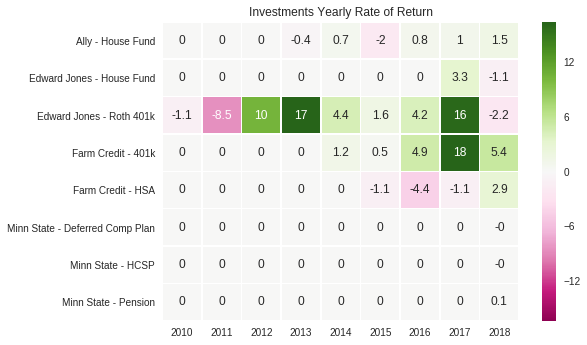

In [96]:
####################Create DataFrames###########################################
current_investment_df   = investment_df[(investment_df.tran_year <= current_year) & (investment_df.tran_month <=current_month)]
begin_balances_dates_df = current_investment_df.groupby(['company','type', 'tran_year'],as_index=False)['first_of_month'].min()
end_balances__dates_df  = current_investment_df.groupby(['company','type', 'tran_year'],as_index=False)['first_of_month'].max()
sum_mror_df             = current_investment_df.groupby(['company','type', 'tran_year'],as_index=False)['mror'].sum()
begin_blanaces_df       = pd.merge(begin_balances_dates_df,current_investment_df,how='inner',on =['company','type','first_of_month','tran_year'])[['company','type','tran_year','begin_balance']]
end_blanaces_df         = pd.merge(end_balances__dates_df,current_investment_df ,how='inner',on =['company','type','first_of_month','tran_year'])[['company','type','tran_year','end_balance']]

#####################Re-setting Indexes#########################################
sum_mror_df.set_index(['company','type','tran_year'],inplace=True )
begin_blanaces_df.set_index(['company','type','tran_year'],inplace=True )
end_blanaces_df.set_index(['company','type','tran_year'],inplace=True )

####################Joining Dataframes##########################################
yearly_ror_df = begin_blanaces_df.join([end_blanaces_df,sum_mror_df])
yearly_ror_df.reset_index(inplace =True)

#####################Fix Data ##################################################
          #outliers
yearly_ror_df['mror'] = yearly_ror_df.mror.fillna(0)#Update NaN values
postive_median        = yearly_ror_df.loc[(yearly_ror_df['mror']>=0) &(yearly_ror_df['mror']<=30), 'mror'].median()
yearly_ror_df["mror"] = np.where(yearly_ror_df["mror"] >30, postive_median,yearly_ror_df['mror'])
negative_median       = yearly_ror_df.loc[(yearly_ror_df['mror']>-30.0)&(yearly_ror_df['mror']<=0.0), 'mror'].median()
yearly_ror_df["mror"] = np.where(yearly_ror_df["mror"] <=-30.0, negative_median,yearly_ror_df['mror'])
        #new column for report label
yearly_ror_df         = yearly_ror_df.assign(investment_name = yearly_ror_df.company.astype(str) + ' - ' + yearly_ror_df.type.astype(str))

####################New Dataframes##############################################
      #investment names with ids
investment_names_df = pd.DataFrame(yearly_ror.investment_name.unique(),columns=['investment_name'])
investment_names_df['investment_id'] = investment_names_df.index +1

###################Joining Dataframes###########################################
yearly_ror_df.set_index(['investment_name'],inplace=True )
investment_names_df.set_index(['investment_name'],inplace=True)
yearly_rate_of_return_df = yearly_ror_df.join([investment_names_df])
  #drop index
yearly_rate_of_return_df.reset_index(inplace =True)
yearly_ror = yearly_rate_of_return_df[['investment_id','investment_name','tran_year','mror']]

#################Create Heat Map################################################
CreateYTDReturnHeatMap(yearly_ror, 'Investments Yearly Rate of Return')


# ***Monthly ROR Heat Maps***

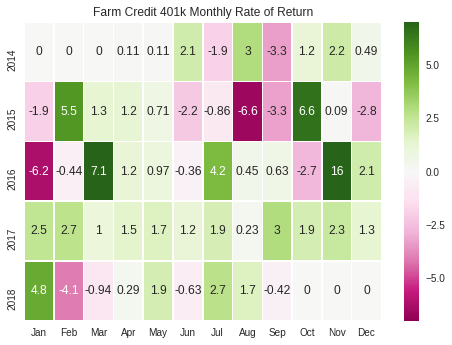

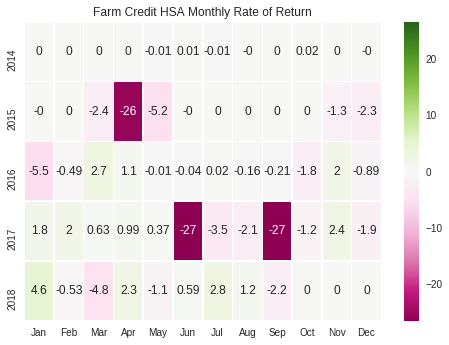

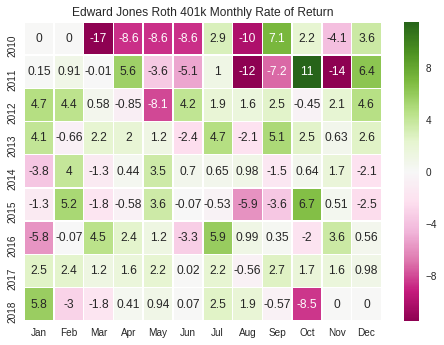

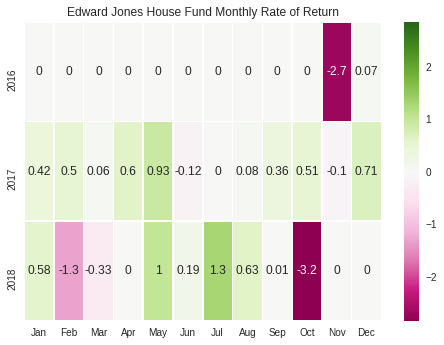

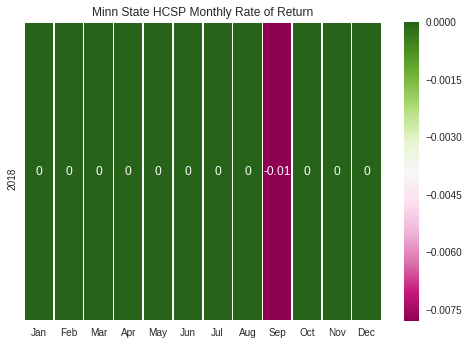

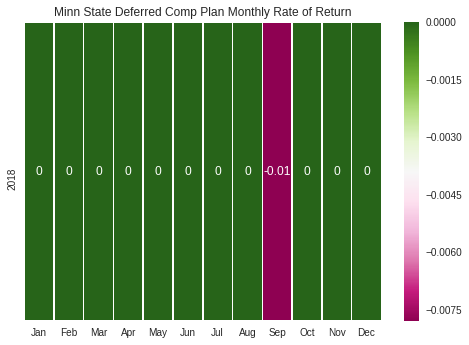

In [93]:
#########################################
##########Farm Credit####################
#########################################
fc_401k_df = investment_df[(investment_df.company == 'Farm Credit') & (investment_df.type == '401k')]
CreateMonthlyHeatMap(fc_401k_df, 'Farm Credit 401k Monthly Rate of Return')

fc_hsa_df = investment_df[(investment_df.company == 'Farm Credit') & (investment_df.type == 'HSA')]
CreateMonthlyHeatMap(fc_hsa_df, 'Farm Credit HSA Monthly Rate of Return') 
#########################################


#########################################
##########Edward Jones###################
ej_roth_df = investment_df[(investment_df.company == 'Edward Jones') & (investment_df.type == 'Roth 401k')]
CreateMonthlyHeatMap(ej_roth_df, 'Edward Jones Roth 401k Monthly Rate of Return') 

ej_house_df = investment_df[(investment_df.company == 'Edward Jones') & (investment_df.type == 'House Fund')]
CreateMonthlyHeatMap(ej_house_df, 'Edward Jones House Fund Monthly Rate of Return') 
#########################################

#########################################
##########Minn State#####################
minnstate_hcsp_df = investment_df[(investment_df.company == 'Minn State') & (investment_df.type == 'HCSP')]
CreateMonthlyHeatMap(minnstate_hcsp_df, 'Minn State HCSP Monthly Rate of Return') 

minnstate_deferredcomp_df = investment_df[(investment_df.company == 'Minn State') & (investment_df.type == 'Deferred Comp Plan')]
CreateMonthlyHeatMap(minnstate_deferredcomp_df, 'Minn State Deferred Comp Plan Monthly Rate of Return') 

#need to add pension plan

#########################################

# ***Investment Balances Over Time By Investment***

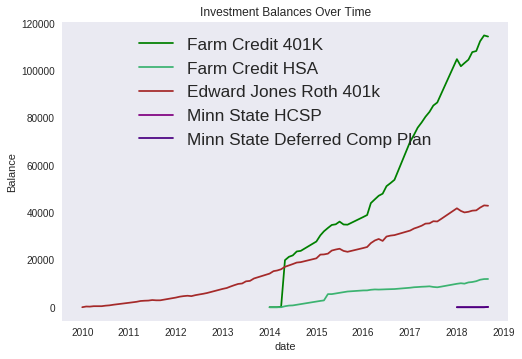

In [123]:
#balances over time
current_year  = now.year
current_month = now.month
balances_df = investment_df[(investment_df.tran_year <= current_year) & (investment_df.tran_month < current_month)][['company', 'type', 'first_of_month','end_balance']]
#balances_df = balances_df.assign(investment_name = balances_df.company.astype(str) + ' - ' + balances_df.type.astype(str))

################################################################################
###################Grabbing data points for lines###############################
#########################Farm Credit############################################
#maybe put logic in function
fc_401k_df = balances_df[(balances_df.company == 'Farm Credit') & (balances_df.type == '401k')][['first_of_month','end_balance']]
x0 = fc_401k_df[['first_of_month']]
y0 = fc_401k_df[['end_balance']]

fc_HSA_df = balances_df[(balances_df.company == 'Farm Credit') & (balances_df.type == 'HSA')][['first_of_month','end_balance']]
x1 = fc_HSA_df[['first_of_month']]
y1 = fc_HSA_df[['end_balance']]
#########################Edwards Jones##########################################
#maybe put logic in function
ej_401k_df = balances_df[(balances_df.company == 'Edward Jones') & (balances_df.type == 'Roth 401k')][[ 'first_of_month','end_balance']]
x2 = ej_401k_df[['first_of_month']]
y2 = ej_401k_df[['end_balance']]

#ej_housefund_df = balances_df[(balances_df.company == 'Edward Jones') & (balances_df.type == 'House Fund')][[ 'first_of_month','end_balance']]
#x3 = ej_housefund_df[['first_of_month']]
#y3 = ej_housefund_df[['end_balance']]
########################Minn State##############################################
minnstate_hcsp_df = balances_df[(balances_df.company == 'Minn State') & (balances_df.type == 'HCSP')][['first_of_month','end_balance']]
x4 = minnstate_hcsp_df[['first_of_month']]
y4 = minnstate_hcsp_df[['end_balance']]

minnstate_deferredcomp_df = balances_df[(balances_df.company == 'Minn State') & (balances_df.type == 'Deferred Comp Plan')][[ 'first_of_month','end_balance']]
x5 = minnstate_deferredcomp_df[['first_of_month']]
y5 = minnstate_deferredcomp_df[['end_balance']]
#need to add pension
################################################################################


################################################################################
##################Graphing out lines############################################
fig, ax = plt.subplots()
ax.plot(x0,y0, 'k', color = 'Green',label = 'Farm Credit 401K')
ax.plot(x1,y1, 'k', color = 'MediumSeaGreen', label = 'Farm Credit HSA')
ax.plot(x2,y2, 'k', color = 'Brown', label = 'Edward Jones Roth 401k')
#ax.plot(x3,y3, 'k', color = 'Gold', label = 'Edward Jones House Fund')
ax.plot(x4,y4, 'k', color = 'Purple', label = 'Minn State HCSP')
ax.plot(x5,y5, 'k', color = 'Indigo', label = 'Minn State Deferred Comp Plan')


ax.set(xlabel='date', ylabel='Balance',title='Investment Balances Over Time')
legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')
ax.grid()

plt.show()
################################################################################


# ***Investment Balances Over Time By Type***

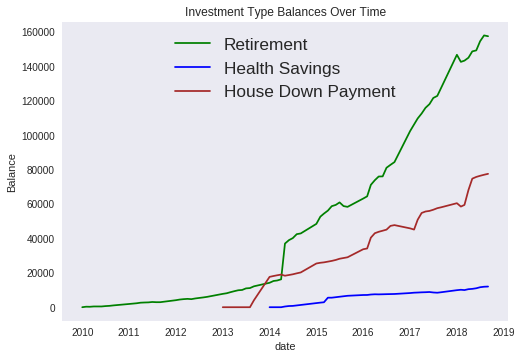

In [124]:
#######################Groupings################################################
#balances_df.loc[ balances_df.type == 'HCSP', 'groupings' ] = 'Health Savings'
balances_df.loc[ balances_df.type.isin(['401k', 'Roth 401k','Deferred Comp Plan']),'groupings'] = 'Retirement'
balances_df.loc[ balances_df.type.isin(['HCSP', 'HSA']),'groupings'] = 'Health Savings'
balances_df.loc[ balances_df.type.isin(['House Fund' ]),'groupings'] = 'House Down Payment'
################################################################################

#######################Summing Groupings########################################
balances_summed_df = balances_df.groupby(['groupings', 'first_of_month'], as_index=False).sum()
################################################################################


###################Grabbing data points for lines###############################
retirement_df = balances_summed_df[(balances_summed_df.groupings == 'Retirement')][['first_of_month','end_balance']]
x0 = retirement_df[['first_of_month']]
y0 = retirement_df[['end_balance']]

health_savings_df = balances_summed_df[(balances_summed_df.groupings == 'Health Savings')][['first_of_month','end_balance']]
x1 = health_savings_df[['first_of_month']]
y1 = health_savings_df[['end_balance']]

house_downpayment_df = balances_summed_df[(balances_summed_df.groupings == 'House Down Payment')][['first_of_month','end_balance']]
x2 = house_downpayment_df[['first_of_month']]
y2 = house_downpayment_df[['end_balance']]

##################Graphing out lines############################################
fig, ax = plt.subplots()
ax.plot(x0,y0, 'k', color = 'Green',label = 'Retirement')
ax.plot(x1,y1, 'k', color = 'Blue', label = 'Health Savings')
ax.plot(x2,y2, 'k', color = 'Brown', label = 'House Down Payment')

ax.set(xlabel='date', ylabel='Balance',title='Investment Type Balances Over Time')
legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')
ax.grid()

plt.show()

################################################################################

# ***Yearly Rate of Return***